<a href="https://colab.research.google.com/github/ashiksanyo10/Loans-Predictor/blob/main/P2P_Loans_Predictor_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
pio.templates.default="plotly_dark"
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from statsmodels.graphics.gofplots import qqplot
from category_encoders.target_encoder import TargetEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import RobustScaler,label_binarize
from sklearn.model_selection import cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.metrics import roc_curve
from scipy.stats import mode

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve,precision_recall_curve,confusion_matrix,classification_report
from pickle import dump

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Internship2023/P2P-Loans-Predictor/LoanData_Bondora.csv")

In [ ]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2021-07-20,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,2016-03-23 16:07:19,970,1150,5.0,BO965519,False,...,0.0,2019-10-28,2020-01-27,NaN,NaN,NaN,NaN,0.00,51.73,31-60
1,2021-07-20,D152382E-A50D-46ED-8FF2-0053E0C86A70,378148,2015-06-25 11:02:28,2015-06-25 11:02:28,1295,0,1705.0,BOA9K172A,False,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,47.08,180+
2,2021-07-20,87342E13-66CB-483F-833A-007953E50C78,451831,2016-01-14 10:00:21,2016-01-14 10:00:21,2700,565,5835.0,BO7971663,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,259.67,1659.60,180+
3,2021-07-20,87227056-6BF9-410C-98D1-008F788E122A,349381,2015-03-24 15:55:44,2015-03-24 15:55:44,1115,0,385.0,BO76151K3,True,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,215.05,180+
4,2021-07-20,2DDE6336-E466-4624-A337-00A0ED1A1468,443082,2015-12-17 10:12:00,2015-12-17 10:12:00,305,0,785.0,BOK423A63,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,180+


In [ ]:
df.shape

(179235, 112)

In [ ]:
for i in range(112):
    print(df.columns[i])

ReportAsOfEOD
LoanId
LoanNumber
ListedOnUTC
BiddingStartedOn
BidsPortfolioManager
BidsApi
BidsManual
UserName
NewCreditCustomer
LoanApplicationStartedDate
LoanDate
ContractEndDate
FirstPaymentDate
MaturityDate_Original
MaturityDate_Last
ApplicationSignedHour
ApplicationSignedWeekday
VerificationType
LanguageCode
Age
DateOfBirth
Gender
Country
AppliedAmount
Amount
Interest
LoanDuration
MonthlyPayment
County
City
UseOfLoan
Education
MaritalStatus
NrOfDependants
EmploymentStatus
EmploymentDurationCurrentEmployer
EmploymentPosition
WorkExperience
OccupationArea
HomeOwnershipType
IncomeFromPrincipalEmployer
IncomeFromPension
IncomeFromFamilyAllowance
IncomeFromSocialWelfare
IncomeFromLeavePay
IncomeFromChildSupport
IncomeOther
IncomeTotal
ExistingLiabilities
LiabilitiesTotal
RefinanceLiabilities
DebtToIncome
FreeCash
MonthlyPaymentDay
ActiveScheduleFirstPaymentReached
PlannedPrincipalTillDate
PlannedInterestTillDate
LastPaymentOn
CurrentDebtDaysPrimary
DebtOccuredOn
CurrentDebtDaysSecondary

In [ ]:
for i in df.columns:
    print(i,df[i].isnull().sum())

ReportAsOfEOD 0
LoanId 0
LoanNumber 0
ListedOnUTC 0
BiddingStartedOn 0
BidsPortfolioManager 0
BidsApi 0
BidsManual 0
UserName 0
NewCreditCustomer 0
LoanApplicationStartedDate 0
LoanDate 0
ContractEndDate 76239
FirstPaymentDate 0
MaturityDate_Original 0
MaturityDate_Last 0
ApplicationSignedHour 0
ApplicationSignedWeekday 0
VerificationType 50
LanguageCode 0
Age 0
DateOfBirth 179235
Gender 45
Country 0
AppliedAmount 0
Amount 0
Interest 0
LoanDuration 0
MonthlyPayment 6690
County 179235
City 179235
UseOfLoan 0
Education 50
MaritalStatus 50
NrOfDependants 143635
EmploymentStatus 202
EmploymentDurationCurrentEmployer 1606
EmploymentPosition 179235
WorkExperience 142713
OccupationArea 91
HomeOwnershipType 1657
IncomeFromPrincipalEmployer 0
IncomeFromPension 0
IncomeFromFamilyAllowance 0
IncomeFromSocialWelfare 0
IncomeFromLeavePay 0
IncomeFromChildSupport 0
IncomeOther 0
IncomeTotal 0
ExistingLiabilities 0
LiabilitiesTotal 0
RefinanceLiabilities 0
DebtToIncome 50
FreeCash 50
MonthlyPaymentDa

# Data Wrangling

In [ ]:
drop_cols=['ReportAsOfEOD','LoanId','LoanNumber','ListedOnUTC','DateOfBirth','BiddingStartedOn','UserName', 'LanguageCode','LoanApplicationStartedDate','FirstPaymentDate','IncomeFromPrincipalEmployer',
           'IncomeFromPension','IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
           'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached','ModelVersion','WorseLateCategory','PlannedPrincipalTillDate',"NextPaymentNr",'ProbabilityOfDefault',
           'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn']

print(len(drop_cols))
df.drop(drop_cols,axis=1,inplace=True)

29


In [ ]:
nan=df.isnull().sum()[df.isnull().sum()>0]
print(nan/len(df))
nan=nan/len(df)
drop_cols=list(nan[nan>0.5].index)
print(len(drop_cols))

ContractEndDate                           0.425358
VerificationType                          0.000279
Gender                                    0.000251
MonthlyPayment                            0.037325
County                                    1.000000
City                                      1.000000
Education                                 0.000279
MaritalStatus                             0.000279
NrOfDependants                            0.801378
EmploymentStatus                          0.001127
EmploymentDurationCurrentEmployer         0.008960
EmploymentPosition                        1.000000
WorkExperience                            0.796234
OccupationArea                            0.000508
HomeOwnershipType                         0.009245
DebtToIncome                              0.000279
FreeCash                                  0.000279
PlannedInterestTillDate                   0.011013
LastPaymentOn                             0.037521
CurrentDebtDaysPrimary         

In [ ]:
df.drop(drop_cols,axis=1,inplace=True)
print(df.shape)

(179235, 50)


In [ ]:
# Dropping Date-Time Columns
date_cols=["LoanDate","MaturityDate_Original","MaturityDate_Last",'LastPaymentOn']
df.drop(date_cols,axis=1,inplace=True)

In [ ]:
df.loc[df['Education']==1,"Education"]="Primary"
df.loc[df['Education']==2,"Education"]="Basic"
df.loc[df['Education']==3,"Education"]="Vocational"
df.loc[df['Education']==4,"Education"]="Secondary"
df.loc[df['Education']==5,"Education"]="Higher"
df.loc[df['Education'] == -1.0,"Education"] = 'Not_present'
df.loc[df['Education'] == 0.0,"Education"] = 'Not_present'

In [ ]:
df.loc[df['EmploymentStatus']==1,"EmploymentStatus"]="Un-Employed"
df.loc[df['EmploymentStatus']==2,"EmploymentStatus"]="Partially-Employed"
df.loc[df['EmploymentStatus']==3,"EmploymentStatus"]="Fully-Employed"
df.loc[df['EmploymentStatus']==4,"EmploymentStatus"]="Self-Employed"
df.loc[df['EmploymentStatus']==5,"EmploymentStatus"]="Entrepreneur"
df.loc[df['EmploymentStatus']==6,"EmploymentStatus"]="Retiree"
df.loc[df['EmploymentStatus']==-1,"EmploymentStatus"]="Unknown"
df.loc[df['EmploymentStatus']==0,"EmploymentStatus"]="Unknown"

In [ ]:
df.loc[df['Gender'] == 1.0,'Gender']= 'Female'
df.loc[df['Gender'] == 2.0,'Gender'] = 'Unknown'

In [ ]:
df.loc[df['HomeOwnershipType']==0,"HomeOwnershipType"]="Homeless"
df.loc[df['HomeOwnershipType']==1,"HomeOwnershipType"]="Owner"
df.loc[df['HomeOwnershipType']==2,"HomeOwnershipType"]='Living_with_parents'
df.loc[df['HomeOwnershipType']==3,"HomeOwnershipType"]='Tenant_pre_furnished_property'
df.loc[df['HomeOwnershipType']==4,"HomeOwnershipType"]="Tenant_unfurnished_property"
df.loc[df['HomeOwnershipType']==5,"HomeOwnershipType"]="Council_house"
df.loc[df['HomeOwnershipType']==6,"HomeOwnershipType"]="Joint_tenant"
df.loc[df['HomeOwnershipType']==7,"HomeOwnershipType"]="Joint_Ownership"
df.loc[df['HomeOwnershipType']==8,"HomeOwnershipType"]="Mortgage"
df.loc[df['HomeOwnershipType']==9,"HomeOwnershipType"]='Owner_with_encumbrance'
df.loc[df['HomeOwnershipType']==10,"HomeOwnershipType"]="Other"
df.loc[df['HomeOwnershipType']==-1,"HomeOwnershipType"]="Unknown"

In [ ]:
df.loc[df['MaritalStatus']==-1,"MaritalStatus"]="Not_specified"
df.loc[df['MaritalStatus']==0,"MaritalStatus"]="Not_specified"
df.loc[df['MaritalStatus']==1,"MaritalStatus"]="Married"
df.loc[df['MaritalStatus']==2,"MaritalStatus"]="Cohabitant"
df.loc[df['MaritalStatus']==3,"MaritalStatus"]="Single"
df.loc[df['MaritalStatus']==4,"MaritalStatus"]="Divorced"
df.loc[df['MaritalStatus']==5,"MaritalStatus"]="Widow"

In [ ]:
df.loc[df['OccupationArea'] == 1,'OccupationArea'] = 'Other'
df.loc[df['OccupationArea'] == 2,'OccupationArea'] = 'Mining'
df.loc[df['OccupationArea'] == 3,'OccupationArea'] = 'Processing'
df.loc[df['OccupationArea'] == 5,'OccupationArea'] = 'Utilities'
df.loc[df['OccupationArea'] == 6,'OccupationArea'] = 'Construction'
df.loc[df['OccupationArea'] == 7,'OccupationArea'] = 'Retail_and_wholesale'
df.loc[df['OccupationArea'] == 8,'OccupationArea'] = 'Transport_and_warehousing'
df.loc[df['OccupationArea'] == 10,'OccupationArea'] = 'Info_and_telecom'
df.loc[df['OccupationArea'] == 11,'OccupationArea'] = 'Finance_and_insurance'
df.loc[df['OccupationArea'] == 12,'OccupationArea'] = 'Real_estate'
df.loc[df['OccupationArea'] == 13,'OccupationArea'] = 'Research'
df.loc[df['OccupationArea'] == 14,'OccupationArea'] = 'Administrative'
df.loc[df['OccupationArea'] == 15,'OccupationArea'] = 'Civil_service_and_military'
df.loc[df['OccupationArea'] == 16,'OccupationArea'] = 'Education'
df.loc[df['OccupationArea'] == 17,'OccupationArea'] = 'Healthcare_and_social_help'
df.loc[df['OccupationArea'] == 18,'OccupationArea'] = 'Art_and_entertainment'
df.loc[df['OccupationArea'] == 19,'OccupationArea'] = 'Agriculture_forestry_and_fishing'
df.loc[df['OccupationArea'] == -1.0,'OccupationArea'] = 'Not_specified'
df.loc[df['OccupationArea'] == 0.0,'OccupationArea'] = 'Not_specified'

In [ ]:
df.loc[df['UseOfLoan'] == -1,'UseOfLoan'] = 'Not_set'
df.loc[df['UseOfLoan'] == 0,'UseOfLoan'] = 'Loan_consolidation'
df.loc[df['UseOfLoan'] == 1,'UseOfLoan'] = 'Real_estate'
df.loc[df['UseOfLoan'] == 2,'UseOfLoan'] = 'Home_improvement'
df.loc[df['UseOfLoan'] == 3,'UseOfLoan'] = 'Business'
df.loc[df['UseOfLoan'] == 4,'UseOfLoan'] = 'Education'
df.loc[df['UseOfLoan'] == 5,'UseOfLoan'] = 'Travel'
df.loc[df['UseOfLoan'] == 6,'UseOfLoan'] = 'Vehicle'
df.loc[df['UseOfLoan'] == 7,'UseOfLoan'] = 'Other'
df.loc[df['UseOfLoan'] == 8,'UseOfLoan'] = 'Health'
df.loc[df['UseOfLoan'] == 101,'UseOfLoan'] = 'Working_capital_financing'
df.loc[df['UseOfLoan'] == 102,'UseOfLoan'] = 'Purchase_of_machinery_equipment'
df.loc[df['UseOfLoan'] == 104,'UseOfLoan'] = 'Accounts_receivable_financing'
df.loc[df['UseOfLoan'] == 106,'UseOfLoan'] = 'Construction_finance'
df.loc[df['UseOfLoan'] == 107,'UseOfLoan'] = 'Acquisition_of_stocks'
df.loc[df['UseOfLoan'] == 108,'UseOfLoan'] = 'Acquisition_of_real_estate'
df.loc[df['UseOfLoan'] == 110,'UseOfLoan'] = 'Other_business'

In [ ]:
df.loc[df['VerificationType'] == 0.0,'VerificationType'] = 'Not_set'
df.loc[df['VerificationType'] == 1.0,'VerificationType'] = 'Income_unverified'
df.loc[df['VerificationType'] == 2.0,'VerificationType'] = 'Income_unverified_crossref_phone'
df.loc[df['VerificationType'] == 3.0,'VerificationType'] = 'Income_verified'
df.loc[df['VerificationType'] == 4.0,'VerificationType'] = 'Income_expenses_verified'

In [ ]:
df.loc[df['NewCreditCustomer'] == False,'NewCreditCustomer'] = 'Existing_credit_customer'
df.loc[df['NewCreditCustomer'] == True,'NewCreditCustomer'] = 'New_credit_Customer'

df.loc[df['Restructured'] == False,'Restructured']='No'
df.loc[df['Restructured'] == True,'Restructured']='Yes'

df.loc[df['RecoveryStage']==1,'RecoveryStage']='Collection'
df.loc[df['RecoveryStage']==0,'RecoveryStage']='Recovery'

# Exploratory Data analysis

In [ ]:
numerical_cols=[col for col in df.columns if df[col].dtype!=object]
categorical_cols=[col for col in df.columns if df[col].dtype==object]
print("No of Numerical features =",len(numerical_cols))
print("No of Categorical features =",len(categorical_cols))

No of Numerical features = 28
No of Categorical features = 18


In [ ]:
def Numerical_Summary():
    for col in numerical_cols:
        print(col)
        print("No of Missing Values =",df[col].isnull().sum())
        print("Skew =",df[col].skew())
        print("Histogram")
        fig=px.histogram(data_frame=df,x=col)
        fig.show()
        print("="*50)

def Categorical_Summary():
    for col in categorical_cols:
        print(col)
        print("No of Missin Values =",df[col].isnull().sum())
        print(df[col].value_counts())
        print("="*50)

In [ ]:
Numerical_Summary()

# Observations from above plots:-


Bids Columns have alot of zero values with skewed right distributions
Age has some values less then 10 which is not possible.
AppliedAmount,Amount are discrete and not continous and have skew of 1.5 and 1.6 .
Interest has 0 NAN's is highly skewed and alot of values are greather then 100.
Monthly Payments has 6685 NANs and is highly skewed right with some 0 values.
Alot of records has 0 IncomeTotal and high skew.
Debt to Income ratio is expressed as percentage, 2 observations have value greather then 100 which is not possible and has 45 NAN.
PlannedInterestTillDate is right skewed with 3000+ NANs.
Principal Overdueby Schedule is skewed right with NANs
CreditScoreEMini has 1 zero value.
5 rows have Principal Amount less then 0.
Monthly payments,debt to income,free cash,Plnned Interest till date,Principal Overdue by Schedule,Previous Repayments Before Loan, Not Scheduled Payments has missing values.

In [ ]:
df=df[df['Age']>10]
df=df[df['AppliedAmount']>0]
df=df[df['DebtToIncome']<100]
df=df[df['CreditScoreEeMini']!=0]
df=df[df['PrincipalBalance']>=0]

In [ ]:
Categorical_Summary()

NewCreditCustomer
No of Missin Values = 0
New_credit_Customer         100348
Existing_credit_customer     78821
Name: NewCreditCustomer, dtype: int64
ContractEndDate
No of Missin Values = 76234
2026-04-27    573
2025-04-28    444
2025-10-27    436
2025-07-28    431
2025-08-27    430
             ... 
2009-10-22      1
2021-12-24      1
2013-07-15      1
2013-07-08      1
2013-07-30      1
Name: ContractEndDate, Length: 4662, dtype: int64
VerificationType
No of Missin Values = 0
Income_expenses_verified            115151
Income_unverified                    52763
Income_verified                       9428
Income_unverified_crossref_phone      1827
Name: VerificationType, dtype: int64
Gender
No of Missin Values = 0
0.0        107710
Female      59279
Unknown     12180
Name: Gender, dtype: int64
Country
No of Missin Values = 0
EE    110648
FI     41955
ES     26270
SK       296
Name: Country, dtype: int64
UseOfLoan
No of Missin Values = 0
Not_set               142647
Other                

# Observations

City,Education,Martial Status,CreditScore,EsMicroEl,Rating,HomeOwnershipType,Occupation Area,EmploymentDuration,Country, VerificationType have missing values.

<Axes: >

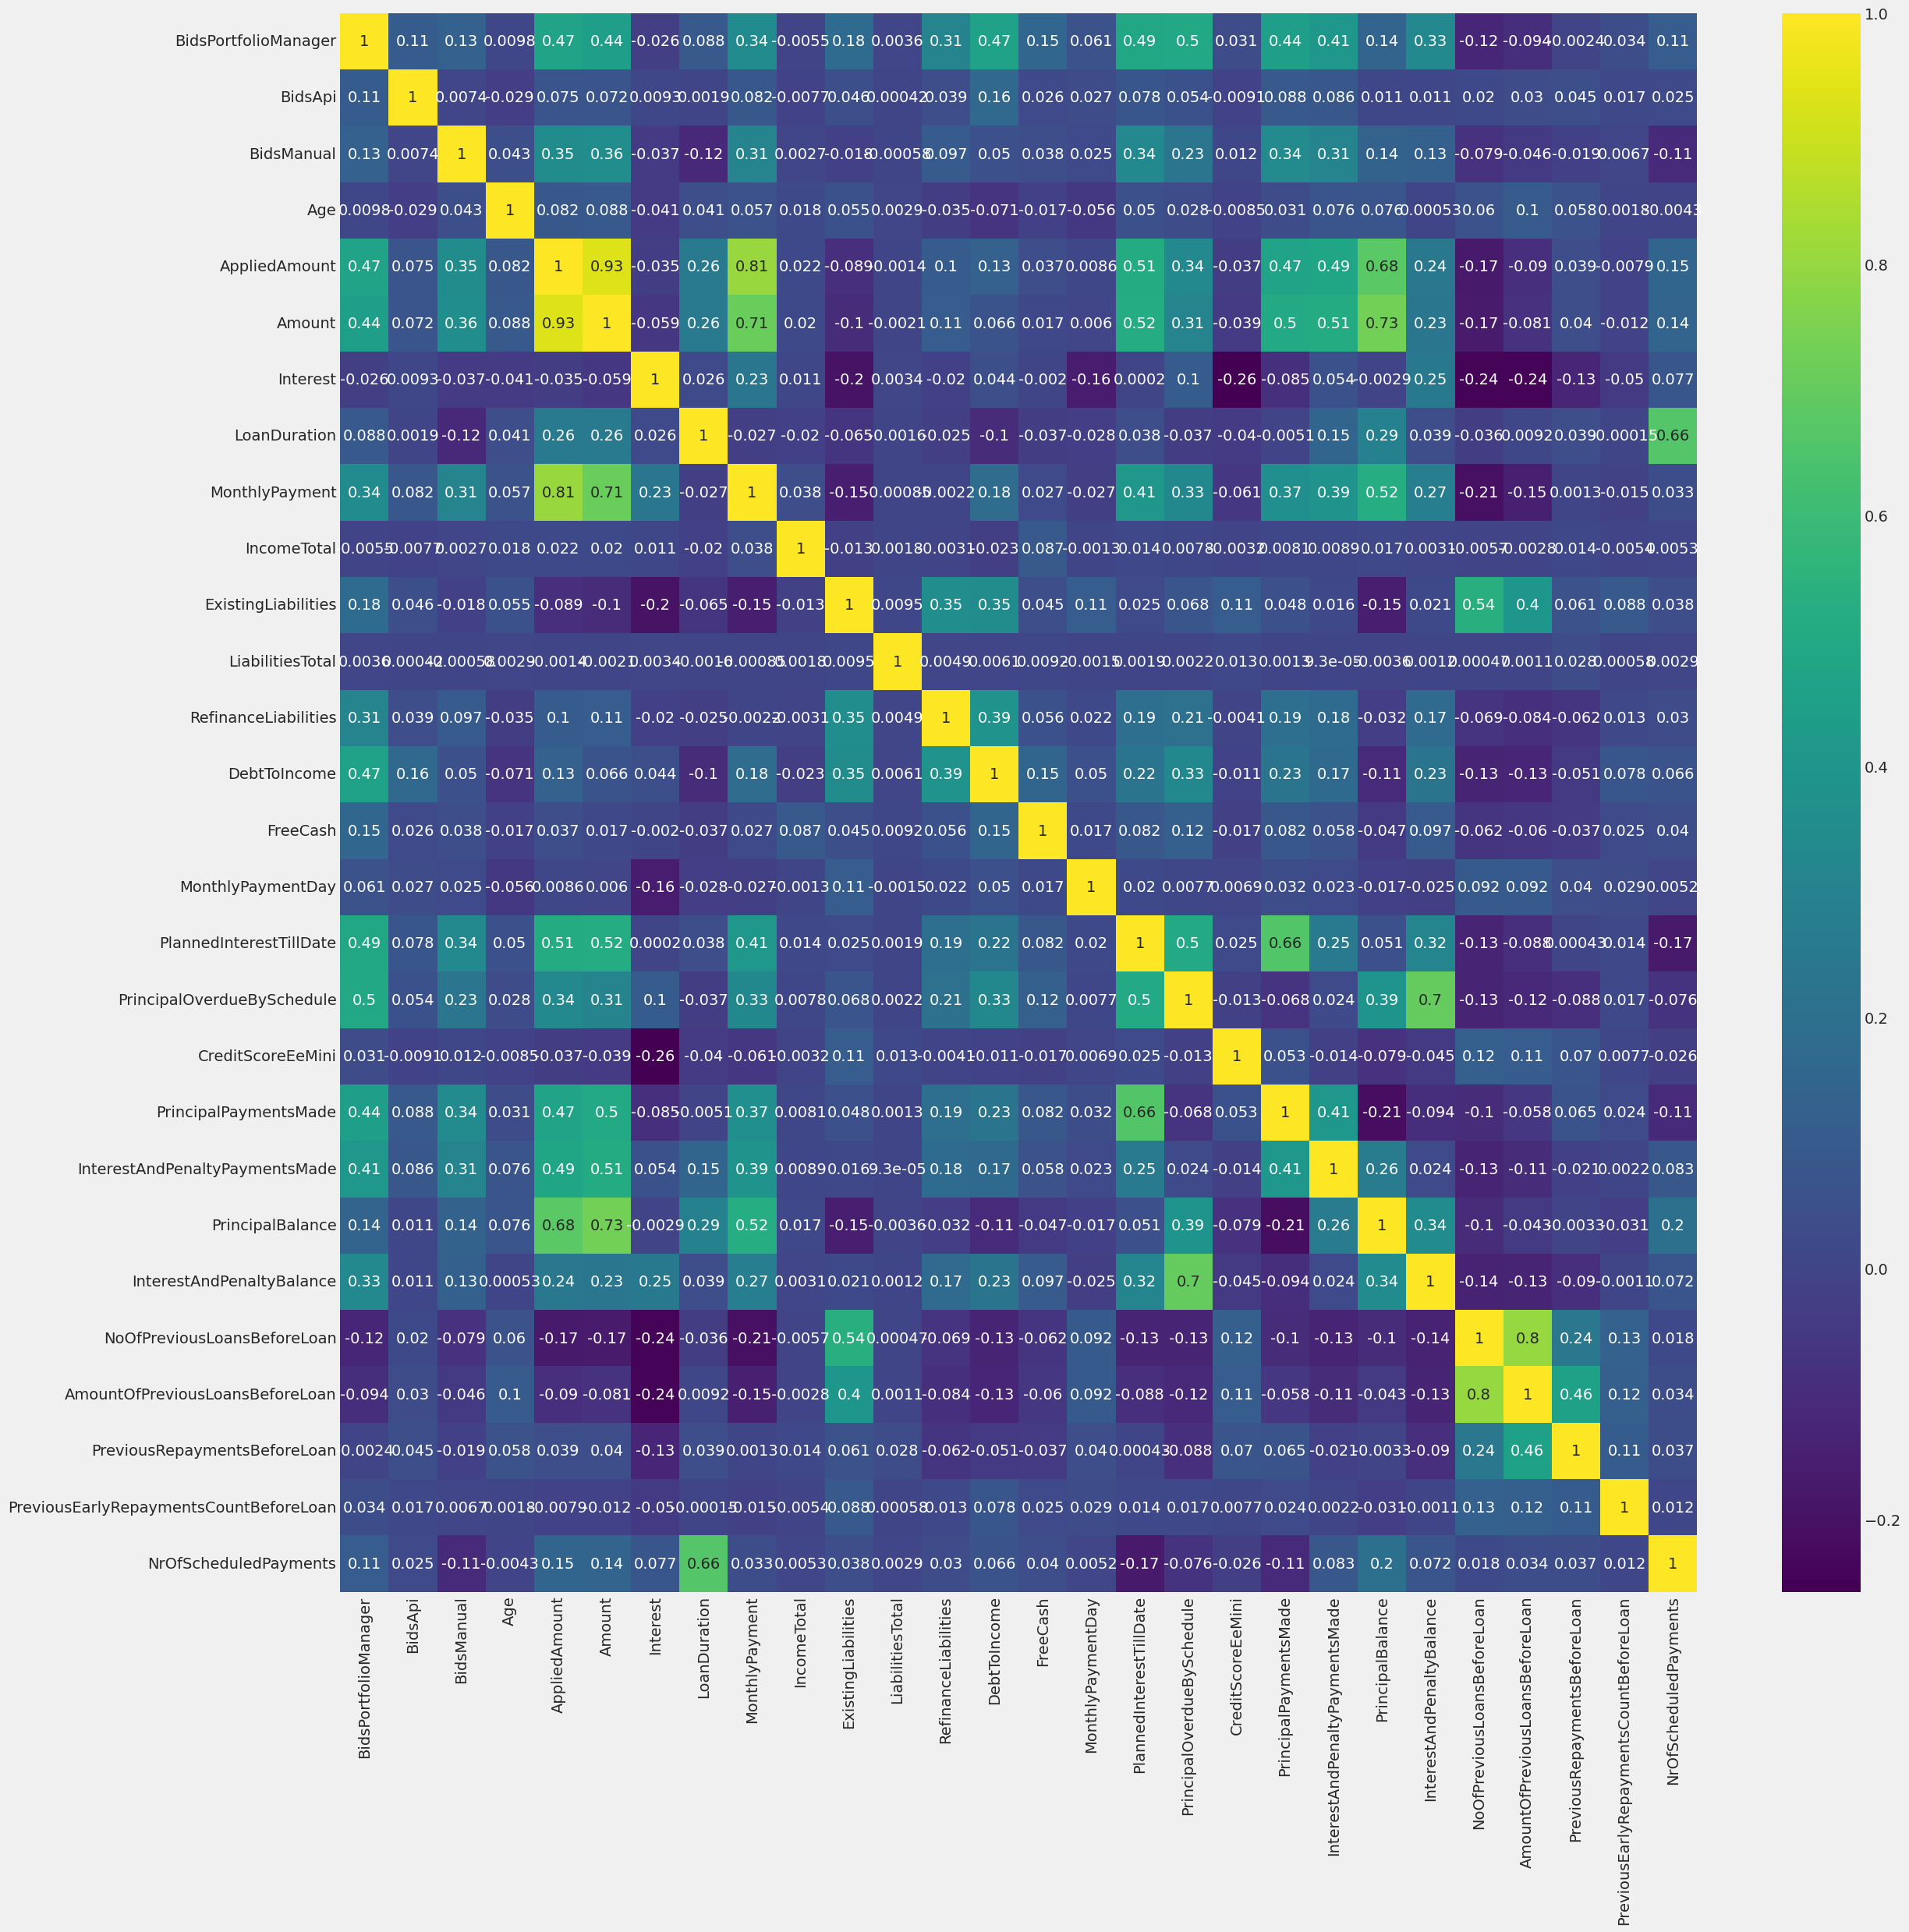

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='viridis')

# Observations

As Applied Ammount,Ammount increases monthlypayments,PrincipalBalance increase.
As Loan Duration increases No of Rescheduled Payments also increases.
Income increases Applied Ammount and Ammount increase and because of that Principal Balance increase e.g A->B,B->C therefore A->C
No of Previous Loans increase AmmountofPreviousLoan also increase.
As Unpaid Interest increases Principal that is overdue also increases.
So there is slight Multicollinearity.

In [ ]:
print("No of Total Lender Error =",len(df.loc[df['Amount']>df['AppliedAmount']]))
print("No of Lender Errors for which Ammount is  greather then Applied Ammount +1=",len(df.loc[df['Amount']>df['AppliedAmount']+1] ))

No of Total Lender Error = 606
No of Lender Errors for which Ammount is  greather then Applied Ammount +1= 0


In [ ]:
px.scatter_3d(data_frame=df,x="AppliedAmount",y='Amount',z='IncomeTotal')

In [84]:
pd.crosstab(df['Status'],df['UseOfLoan'])

UseOfLoan,Business,Education,Health,Home_improvement,Loan_consolidation,Not_set,Other,Real_estate,Travel,Vehicle
Status,,,,,,,,,,
Current,81,52,59,505,242,56252,348,54,77,104
Late,734,517,592,3657,2404,54557,4047,338,677,1051
Repaid,1135,797,868,5028,4265,31838,5303,562,1033,1992


In [86]:
pd.crosstab(df['Status'],df['EmploymentStatus'])

EmploymentStatus,Entrepreneur,Fully-Employed,Partially-Employed,Retiree,Self-Employed,Unknown
Status,,,,,,
Current,143,1264,29,38,48,56252
Late,586,11210,491,1006,693,54570
Repaid,1278,17578,664,756,562,31849


In [87]:
pd.crosstab(df['Status'],df['CreditScoreEsMicroL'])

CreditScoreEsMicroL,M,M1,M10,M2,M3,M4,M5,M6,M7,M8,M9
Status,,,,,,,,,,,
Current,55470,61,1,24,35,19,19,2,0,0,0
Late,51123,2737,41,990,947,1031,1498,369,43,69,57
Repaid,29822,1523,13,709,662,490,915,189,26,33,13


In [88]:
fig=go.Figure()
fig.add_trace(go.Box(x=df['Status'],y=df['ExistingLiabilities']))

# Preparing data for Modelling

In [89]:
df.drop(['StageActiveSince'],axis=1,inplace=True)
print(df.shape)

(179169, 45)


In [90]:
df.to_csv("Preprocessed_Bondora.csv",index=False)

In [91]:
X_train,X_test,y_train,y_test=train_test_split(df.drop("Status",axis=1),df['Status'],test_size=0.3,random_state=42,stratify=df['Status'])
print("Training Data Shape =",X_train.shape)
print("Testing Data Shape =",X_test.shape)

Training Data Shape = (125418, 44)
Testing Data Shape = (53751, 44)


In [92]:
class Prepare_data():
    def __init__(self,estimator,X,y,n_choice,param_grid,train=False,X_test=None):
        self.estimator=estimator
        self.X=X.copy()
        self.y=y.copy()
        self.n_choice=n_choice
        self.param_grid=param_grid
        if X_test is not None:
            self.X_test=X_test.copy()
        else:
            self.X_test=None
        self.estimator=estimator
        if estimator=='RFC':
            self.model=RandomForestClassifier()
        elif estimator=='XGBC':
            self.model=XGBClassifier(objective='multi:softprob',verbosity = 0,silent=True,eval_metric='mlogloss')
        elif estimator=='SVC':
            self.model=SVC()
        else:
            self.model=LogisticRegression()
        self.X=self.data_imputation(self.X)
        if self.X_test is not None:
            self.X_test=self.data_imputation(self.X_test)
        self.Data_Preparation(self.X,self.y)
    def data_imputation(self,data):
        missing_cols=[col for col in data.columns if data[col].isnull().sum()>0]
        cat_cols=[col for col in missing_cols if data[col].dtype==object and col!="Status"]
        num_cols=[col for col in missing_cols if data[col].dtype!=object]
        data[cat_cols]=data[cat_cols].fillna("missing")
        for col in num_cols:
            data[col]=data[col].fillna(data[col].median())
        return data
    def Feature_Selection(self):
        X=self.X.copy()
        y=self.y.copy()
        n_choice=self.n_choice
        random_indices=np.random.choice(X.shape[0],20000)
        X_new=X.iloc[random_indices,:]
        X_new=X_new.reset_index(drop=True)
        y_new=y[random_indices]
        cat_cols=[col for col in self.X.columns if self.X[col].dtype==object]
        num_cols=[col for col in self.X.columns if self.X[col].dtype!=object]

        targetencoder=TargetEncoder()



        X_new=X_new[num_cols].join(targetencoder.fit_transform(X_new[cat_cols],y_new))

        etc=ExtraTreesClassifier()
        etc.fit(X_new,y_new)
        feature_importances=pd.DataFrame(sorted(zip(etc.feature_importances_,X_new.columns),reverse=True),columns=['Imp','Col'])
        fig=px.bar(feature_importances,x="Imp",y="Col",template="plotly_dark")
        fig.show()
        return list(feature_importances.head(self.n_choice)['Col'])
    def Data_Preparation(self,X,y):
        cat_cols=[col for col in X.columns if X[col].dtype==object]
        for col in cat_cols:
            X[col]=X[col].astype(str)
        ordinal_cols=["Rating",'CreditScoreEsMicroL',"Education"]
        ordinal_cols=[col for col in list(X.columns) if col in ordinal_cols]
        nominal_cols=[col for col in cat_cols if col not in ordinal_cols]
        for col in ordinal_cols:
            lb=LabelEncoder()
            X[col]=lb.fit_transform(X[col])
            if self.X_test is not None:
                self.X_test[col]=self.X_test[col].map(lambda s: '<unknown>' if s not in lb.classes_ else s)
                lb.classes_ = np.append(lb.classes_, '<unknown>')
                self.X_test[col]=lb.transform(self.X_test[col])
        num_cols=[col for col in X.columns if X[col].dtype!=object]
        transformer=ColumnTransformer([("CATEGORICAL",OneHotEncoder(handle_unknown="ignore"),nominal_cols),
                                       ("NUMERICAL",RobustScaler(),num_cols)])
        self.nominal_encoder=lb
        self.lb=LabelEncoder()
        self.y=self.lb.fit_transform(y)
        self.preprocessor=transformer

    def Cross_Validation(self):
        X=self.preprocessor.fit_transform(self.X)
        y=self.y.copy()

        stratifiedkfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
        scores=cross_val_score(self.model,X,y,cv=stratifiedkfold,scoring="roc_auc_ovr")
        print("Mean ROC AUC =",scores.mean()
             )
        return scores
    def GridSearch(self):
        X=self.X.copy()
        y=self.y.copy()
        X=self.preprocessor.fit_transform(X)
        grid=GridSearchCV(self.model,self.param_grid,scoring="roc_auc_ovr")
        grid.fit(X,y)
        print("Best ROC AUC =",grid.best_score_)
        return grid.best_estimator_
    def train(self):
        X_train=self.X.copy()
        X_test=self.X_test.copy()
        y_train=self.y.copy()
        test_predictions=pd.DataFrame(columns=['Fold_1','Fold_2','Fold_3','Fold_4','Fold_5'])
        test_prob_predictions=np.zeros((self.X_test.shape[0],3))
        kfold=StratifiedKFold(shuffle=True,random_state=42)
        i=0
        for train_idx,val_idx in kfold.split(X_train,y_train):
            train_data=self.preprocessor.fit_transform(X_train.iloc[train_idx])
            val_data=self.preprocessor.transform(X_train.iloc[val_idx])
            test_data=self.preprocessor.transform(X_test)
            if self.estimator=='RFC':

                model=RandomForestClassifier()
            elif self.estimator=='XGBC':

                model=XGBClassifier(objective='multi:softprob')
            elif self.estimator=='SVC':

                model=SVC()
            else:

                model=LogisticRegression()
            model.fit(train_data,self.y[train_idx])
            val_predictions=model.predict(val_data)
            print(f"Validation F1 Micro Score for Fold{i+1} =",f1_score(self.y[val_idx],val_predictions,average='micro'))
            test_predictions["Fold_"+str(i+1)]=model.predict(test_data)
            prob=model.predict_proba(test_data)
            test_prob_predictions=(test_prob_predictions+prob)
            with open(f"Model_fold{i+1}.pkl","wb") as f:
                dump(model,f)
            with open(f"Preprocessing_Pipeline_fold{i+1}.pkl","wb") as p:
                dump(self.preprocessor,p)


            i+=1
        test_prob_predictions=test_prob_predictions/5
        test_predictions=test_predictions.T
        test_predictions=test_predictions.reset_index(drop=True)
        test_predictions=test_predictions.apply(lambda x: mode(x)[0]).values




        return test_predictions,test_prob_predictions,self.lb,self.nominal_encoder

# Modelling

In [93]:
model=Prepare_data(None,X_train,y_train,30,{})
cols=model.Feature_Selection()

In [94]:
model=Prepare_data("XGBC",X_train[cols],y_train,None,{},True,X_test[cols])
p,probs,lb,ne=model.train()

Validation F1 Micro Score for Fold1 = 0.9948572795407431
Validation F1 Micro Score for Fold2 = 0.9944586190400255
Validation F1 Micro Score for Fold3 = 0.9946180832403125
Validation F1 Micro Score for Fold4 = 0.9953753538253
Validation F1 Micro Score for Fold5 = 0.9945381333971216


In [95]:
f1_score(y_test,lb.inverse_transform(p.T),average="micro")

0.9882234749120946

In [96]:
roc_auc_score(y_test,probs,multi_class="ovr")

0.9995294406608424

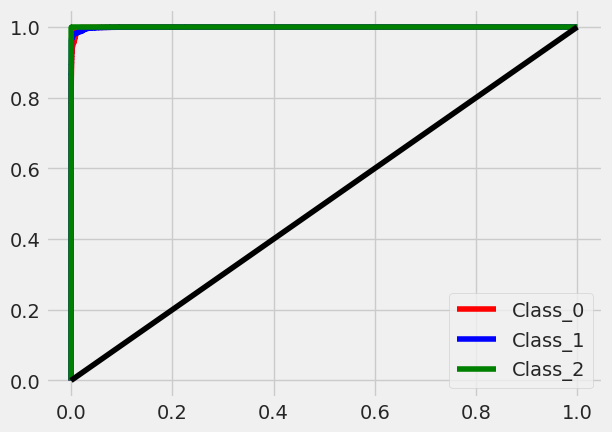

In [97]:
def plot_roc_curve(y_test,y_test_prob):
    y=y_test.copy()
    labelbinarizer=LabelBinarizer()
    y_test=labelbinarizer.fit_transform(y_test)
    fpr_0,tpr_0,thr_0=roc_curve(y_test[:,0],y_test_prob[:,0])
    fpr_1,tpr_1,thr_1=roc_curve(y_test[:,1],y_test_prob[:,1])
    fpr_2,tpr_2,thr_2=roc_curve(y_test[:,2],y_test_prob[:,2])
    a,b,c=roc_curve(y_test[:,1],y_test_prob[:,1])
    plt.plot(fpr_0,tpr_0,color="red",label="Class_0")
    plt.plot(fpr_1,tpr_1,color='blue',label="Class_1")
    plt.plot(fpr_2,tpr_2,color="green",label="Class_2")
    plt.plot([0,1],[0,1],color="black")
    plt.legend()
plot_roc_curve(y_test,probs)

<Axes: >

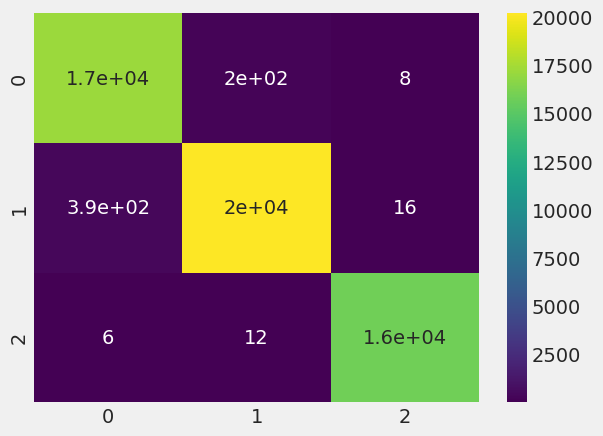

In [98]:
sns.heatmap(confusion_matrix(y_test,lb.inverse_transform(p.T)),annot=True,cmap="viridis")